In [8]:
import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np
from scipy.signal import peak_widths
import h5py
import collections
import colorsys

from utils.decompose_dict_and_h5_groups import decompose_h5_groups_to_dict
from utils.load_rois_data import load_rois_data
from utils.paint_roi import paint_roi
from analysis.utils.extract_from_metadata_file import extract_from_metadata_file
from analysis.plots import *


In [9]:
# data paths
base_path = '/data/Rotem/WideFlow prj/'
statistics_path = base_path + 'results/sessions_statistics_new.h5'
dataset_path = base_path + 'results/sessions_dataset_new.h5'

cortex_map_path = '/data/Rotem/Wide Field/WideFlow/data/cortex_map/allen_2d_cortex.h5'
# rois_dict_path = '/data/Rotem/Wide Field/WideFlow/data/cortex_map/allen_2d_cortex_rois.h5'  # whole cortex
rois_dict_path = '/data/Rotem/Wide Field/WideFlow/data/cortex_map/allen_2d_cortex_rois_left_hemi.h5'  # left hemisphere


In [13]:
# mouse ID, sessions to examine and all other parameters - CHANGE IT IF NECESSARY
mouse_id = '2683'
mouse_base_path = base_path + mouse_id + '/'

sessions_names = [
    '20220206_neurofeedback',
#     '20220207_neurofeedback',
#     '20220208_neurofeedback',
    '20220209_neurofeedback',
#     '20220210_neurofeedback',
]

metric_rois_idx = [16]


In [14]:
# load data
with h5py.File(cortex_map_path, 'r') as f:
    cortex_mask = np.transpose(f["mask"][()])
    cortex_map = np.transpose(f["map"][()])

rois_dict = load_rois_data(rois_dict_path)
rois_dict = collections.OrderedDict(sorted(rois_dict.items()))
rois_names_code = list(rois_dict.keys())
rois_names = [v['name'] for k, v in rois_dict.items()]

nrois = len(rois_dict)

metric_bool_arr = np.array([True if i in metric_rois_idx else False for i in range(nrois)])
non_metric_bool_arr = np.invert(metric_bool_arr)

sessions_stats = {}
with h5py.File(statistics_path, 'a') as f:
    decompose_h5_groups_to_dict(f, sessions_stats, f'/{mouse_id}/')


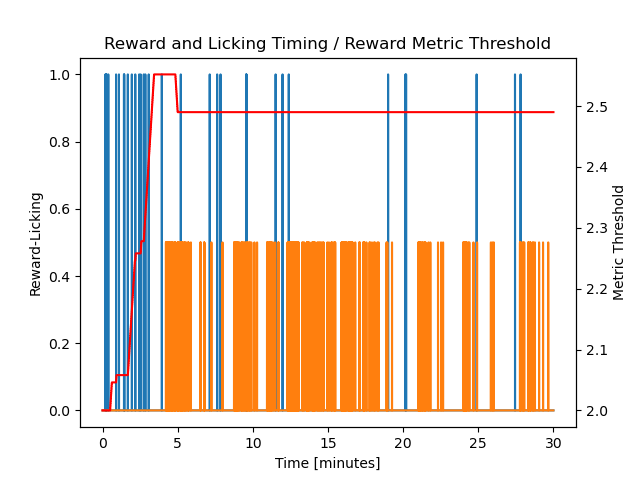

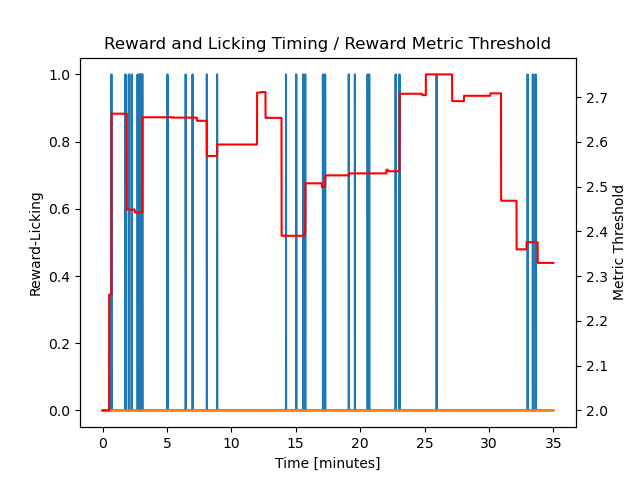

In [15]:
# plot sessions statistics
for sess_name in sessions_names:
    timestamp, cue, metric_result, threhold, serial_readout = extract_from_metadata_file(mouse_base_path + sess_name + '/metadata.txt')
    f, ax = plt.subplots()
    plot_reward_response(ax, cue, serial_readout, threhold, 0.03)
    
    

In [6]:
# prepare data for ploting
plot_data = {}
for sess_name in sessions_names:
    sess_data = sessions_stats[sess_name]

    dff_pstr = sess_data['traces']['pstr_sim_reward']
    dff_zscore_pstr = sess_data['traces']['pstr_zscore_sim_reward']

    div_pstr = sess_data['regression_divergence']['pstr_sim_reward']
    div_zscore_pstr = sess_data['regression_divergence']['pstr_zscore_sim_reward']

    diff_1f_pstr = sess_data['delta_frames_1']['pstr_sim_reward']
    diff_1f_zscore_pstr = sess_data['delta_frames_1']['pstr_zscore_sim_reward']

    diff_3f_pstr = sess_data['delta_frames_3']['pstr_sim_reward']
    diff_3f_zscore_pstr = sess_data['delta_frames_3']['pstr_zscore_sim_reward']

    diff_5f_pstr = sess_data['delta_frames_5']['pstr_sim_reward']
    diff_5f_zscore_pstr = sess_data['delta_frames_5']['pstr_zscore_sim_reward']
    
    sess_plot_data = {}
    # pstr (simulated rewards) - peaks
    sess_plot_data["dff_pstr_max"] = np.max(dff_pstr, axis=1)
    sess_plot_data["dff_zscore_pstr_max"] = np.max(dff_zscore_pstr, axis=1)

    sess_plot_data["div_pstr_max"] = np.max(div_pstr, axis=1)
    sess_plot_data["div_zscore_pstr_max"] = np.max(div_zscore_pstr, axis=1)

    sess_plot_data["diff_1f_pstr_max"] = np.max(diff_1f_pstr, axis=1)
    sess_plot_data["diff_1f_zscore_pstr_max"] = np.max(diff_1f_zscore_pstr, axis=1)

    sess_plot_data["diff_3f_pstr_max"] = np.max(diff_3f_pstr, axis=1)
    sess_plot_data["diff_3f_zscore_pstr_max"] = np.max(diff_3f_zscore_pstr, axis=1)

    sess_plot_data["diff_5f_pstr_max"] = np.max(diff_5f_pstr, axis=1)
    sess_plot_data["diff_5f_zscore_pstr_max"] = np.max(diff_5f_zscore_pstr, axis=1)


    # pstr (simulated rewards) - width
    sess_plot_data["dff_pstr_width"] = np.ndarray((nrois, 1))
    sess_plot_data["dff_zscore_pstr_width"] = np.ndarray((nrois, 1))

    sess_plot_data["div_pstr_width"] = np.ndarray((nrois, 1))
    sess_plot_data["div_zscore_pstr_width"] = np.ndarray((nrois, 1))

    sess_plot_data["diff_1f_pstr_width"] = np.ndarray((nrois, 1))
    sess_plot_data["diff_1f_zscore_pstr_width"] = np.ndarray((nrois, 1))

    sess_plot_data["diff_3f_pstr_width"] = np.ndarray((nrois, 1))
    sess_plot_data["diff_3f_zscore_pstr_width"] = np.ndarray((nrois, 1))

    sess_plot_data["diff_5f_pstr_width"] = np.ndarray((nrois, 1))
    sess_plot_data["diff_5f_zscore_pstr_width"] = np.ndarray((nrois, 1))
    
    for i in range(nrois):
        sess_plot_data["dff_pstr_width"][i] = peak_widths(dff_pstr[i], [np.argmax(dff_pstr[i])])[0]
        sess_plot_data["dff_zscore_pstr_width"][i] = peak_widths(dff_zscore_pstr[i], [np.argmax(dff_zscore_pstr[i])])[0]

        sess_plot_data["div_pstr_width"][i] = peak_widths(div_pstr[i], [np.argmax(div_pstr[i])])[0]
        sess_plot_data["div_zscore_pstr_width"][i] = peak_widths(div_zscore_pstr[i], [np.argmax(div_zscore_pstr[i])])[0]

        sess_plot_data["diff_1f_pstr_width"][i] = peak_widths(diff_1f_pstr[i], [np.argmax(diff_1f_pstr[i])])[0]
        sess_plot_data["diff_1f_zscore_pstr_width"][i] = peak_widths(diff_1f_zscore_pstr[i], [np.argmax(diff_1f_zscore_pstr[i])])[0]

        sess_plot_data["diff_3f_pstr_width"][i] = peak_widths(diff_3f_pstr[i], [np.argmax(diff_3f_pstr[i])])[0]
        sess_plot_data["diff_3f_zscore_pstr_width"][i] = peak_widths(diff_3f_zscore_pstr[i], [np.argmax(diff_3f_zscore_pstr[i])])[0]

        sess_plot_data["diff_5f_pstr_width"][i] = peak_widths(diff_5f_pstr[i], [np.argmax(diff_5f_pstr[i])])[0]
        sess_plot_data["diff_5f_zscore_pstr_width"][i] = peak_widths(diff_5f_zscore_pstr[i], [np.argmax(diff_5f_zscore_pstr[i])])[0]
        
    # pstr time delay
    
    plot_data[sess_name] = sess_plot_data
    

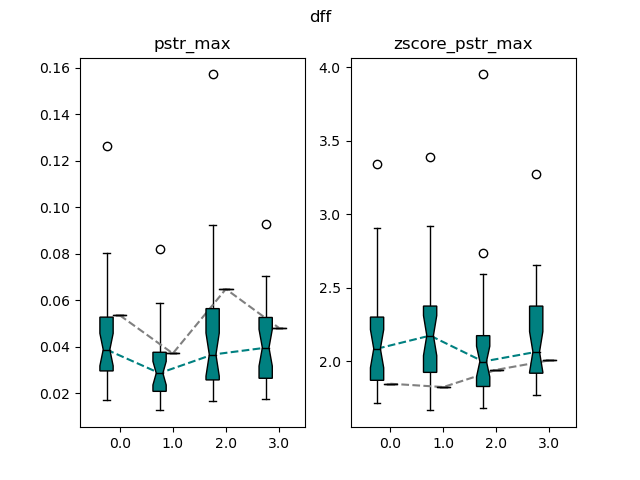

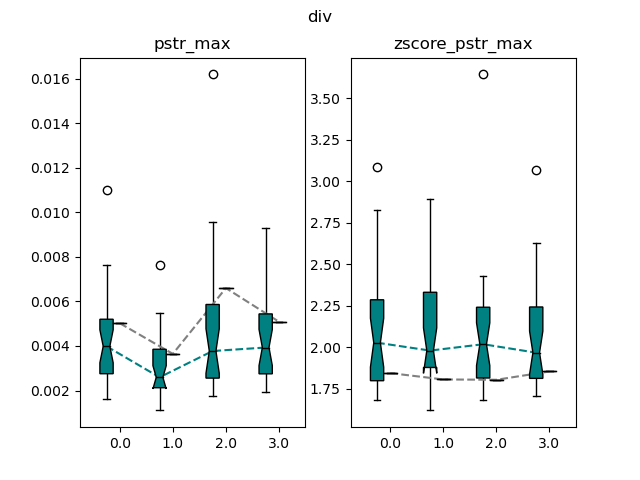

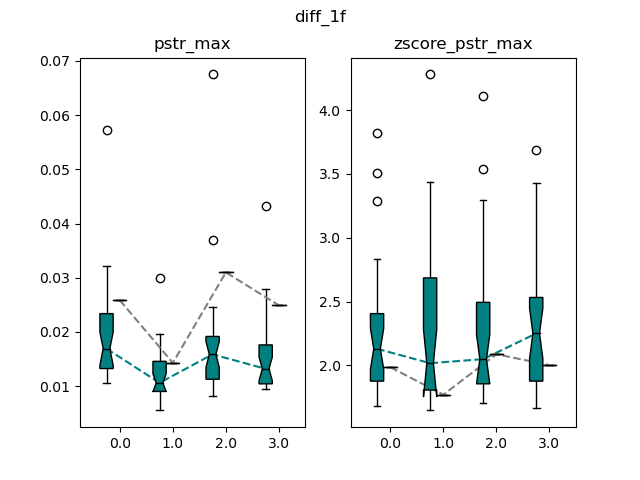

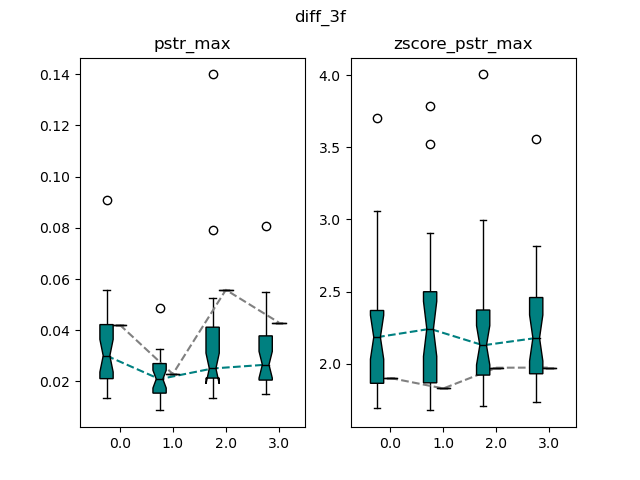

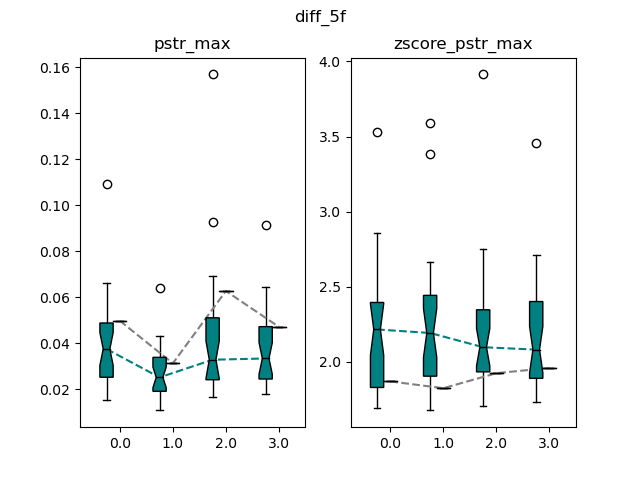

In [7]:
# box plotsssssssssss
# dff_pstr_max_m = []
# dff_pstr_max_nm = []
# for sess_name, sess_data in plot_data.items():
#     dff_pstr_max_m.append(sess_data["diff_5f_pstr_max"][metric_bool_arr])
#     dff_pstr_max_nm.append(sess_data["diff_5f_zscore_pstr_max"][non_metric_bool_arr])
    
# dff_pstr_max_m = np.nan_to_num(np.array(dff_pstr_max_m).transpose(), nan=0)
# dff_pstr_max_nm = np.nan_to_num(np.array(dff_pstr_max_nm).transpose(), nan=0)

# f, ax = plt.subplots()
# plot_box_plot(ax, dff_pstr_max_nm, dff_pstr_max_m, set_title="sdfsdfsdf")
# plt.show()

metrics = ['dff', 'div', 'diff_1f', 'diff_3f', 'diff_5f']
for metric in metrics:
    f, (ax1, ax2) = plt.subplots(1, 2)
    pstr_max_m, pstr_max_nm = [], []
    
    pstr_zscore_max_m, pstr_zscore_max_nm = [], []
    
    for sess_name in sessions_names:
        # ax1 for pstr max
        pstr_max_nm.append(plot_data[sess_name][f"{metric}_pstr_max"][non_metric_bool_arr])
        pstr_max_m.append(plot_data[sess_name][f"{metric}_pstr_max"][metric_bool_arr])
        
        # ax3 for z-score pstr max
        pstr_zscore_max_nm.append(plot_data[sess_name][f"{metric}_zscore_pstr_max"][non_metric_bool_arr])
        pstr_zscore_max_m.append(plot_data[sess_name][f"{metric}_zscore_pstr_max"][metric_bool_arr])
    
    pstr_max_nm = np.nan_to_num(np.array(pstr_max_nm).transpose(), nan=0)
    pstr_max_m = np.nan_to_num(np.array(pstr_max_m).transpose(), nan=0)
    pstr_zscore_max_nm = np.nan_to_num(np.array(pstr_zscore_max_nm).transpose(), nan=0)
    pstr_zscore_max_m = np.nan_to_num(np.array(pstr_zscore_max_m).transpose(), nan=0)
    

    plot_box_plot(ax1, pstr_max_nm, pstr_max_m, set_title="pstr_max", )
    plot_box_plot(ax2, pstr_zscore_max_nm, pstr_zscore_max_m, set_title="zscore_pstr_max")
    
    f.suptitle(metric)
    plt.show()

In [ ]:
# All ROIs PSTR plotsssssssssss for each metric
c = ['red' if i else 'blue' for i in metric_bool_arr]
l = [3 if i else 0.2 for i in metric_bool_arr]

metric_list = ['traces', 'regression_divergence', 'delta_frames_1', 'delta_frames_3', 'delta_frames_5']
for metric in metric_list:
    f, ((ax1,ax2),(ax3,ax4), (ax5, ax6)) = plt.subplots(3,2)
    for i, pstr in enumerate(sessions_stats['20220206_neurofeedback'][metric]['pstr_sim_reward']):
        ax1.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220207_neurofeedback'][metric]['pstr_sim_reward']):
        ax2.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220208_neurofeedback'][metric]['pstr_sim_reward']):
        ax3.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220209_neurofeedback'][metric]['pstr_sim_reward']):
        ax4.plot(pstr, color=c[i], linewidth=l[i])
#     for i, pstr in enumerate(sessions_stats['20220210_neurofeedback'][metric]['pstr_sim_reward']):
#         ax5.plot(pstr, color=c[i], linewidth=l[i])
        
    f.suptitle(f'{metric} PSTR')
    ax1.set_title('20220206_neurofeedback')
    ax2.set_title('20220207_neurofeedback')
    ax3.set_title('20220208_neurofeedback')
    ax4.set_title('20220209_neurofeedback')
    ax5.set_title('20220210_neurofeedback')
    f.tight_layout()
    plt.show()

    f, ((ax1,ax2),(ax3,ax4), (ax5, ax6)) = plt.subplots(3,2)
    for i, pstr in enumerate(sessions_stats['20220206_neurofeedback'][metric]['pstr_zscore_sim_reward']):
        ax1.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220207_neurofeedback'][metric]['pstr_zscore_sim_reward']):
        ax2.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220208_neurofeedback'][metric]['pstr_zscore_sim_reward']):
        ax3.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220209_neurofeedback'][metric]['pstr_zscore_sim_reward']):
        ax4.plot(pstr, color=c[i], linewidth=l[i])
#     for i, pstr in enumerate(sessions_stats['20220210_neurofeedback'][metric]['pstr_zscore_sim_reward']):
#         ax5.plot(pstr, color=c[i], linewidth=l[i])

    f.suptitle(f'{metric} Z-Score PSTR')
    ax1.set_title('20220206_neurofeedback')
    ax2.set_title('20220207_neurofeedback')
    ax3.set_title('20220208_neurofeedback')
    ax4.set_title('20220209_neurofeedback')
    ax5.set_title('20220210_neurofeedback')
    f.tight_layout()
    plt.show()




In [ ]:
# Individuals ROIs PSTR plotsssssssss and painted cortex map
rois_inds = [16, 5, 3, 20]
for roi_idx in rois_inds:
    f = plt.figure(figsize=(5.5, 3.5), constrained_layout=True)
    spec = f.add_gridspec(2, 3)
    ax00 = f.add_subplot(spec[0, 0])
    ax01 = f.add_subplot(spec[0, 1])
    ax10 = f.add_subplot(spec[1, 0])
    ax11 = f.add_subplot(spec[1, 1])
    ax02 = f.add_subplot(spec[0, 2])
#     ax12 = f.add_subplot(spec[1, 2])
    
    for sess_name in sessions_names:     
        ax00.plot(sessions_stats[sess_name]['traces']['pstr_sim_reward'][roi_idx])
        ax01.plot(sessions_stats[sess_name]['regression_divergence']['pstr_sim_reward'][roi_idx])
        ax10.plot(sessions_stats[sess_name]['delta_frames_1']['pstr_sim_reward'][roi_idx])
        ax11.plot(sessions_stats[sess_name]['delta_frames_5']['pstr_sim_reward'][roi_idx])
        
    paint_roi(rois_dict, cortex_map, [rois_names_code[roi_idx]], ax=ax02)
    
    ax00.set_title('traces')
    ax01.set_title('regression_divergence')
    ax10.set_title('delta_frames_1')
    ax11.set_title('delta_frames_5')
    ax02.set_title('cortex map')
        
    f.suptitle(f'ROI - {rois_names[roi_idx]} Metrics PSTR')
    f.tight_layout()
    ax00.legend(sessions_names, bbox_to_anchor=(5., -0.6))
    plt.show()
    
    
    f = plt.figure(figsize=(5.5, 3.5), constrained_layout=True)
    spec = f.add_gridspec(2, 3)
    ax00 = f.add_subplot(spec[0, 0])
    ax01 = f.add_subplot(spec[0, 1])
    ax10 = f.add_subplot(spec[1, 0])
    ax11 = f.add_subplot(spec[1, 1])
    ax02 = f.add_subplot(spec[0, 2])
#     ax12 = f.add_subplot(spec[1, 2])
    
    for sess_name in sessions_names:     
        ax00.plot(sessions_stats[sess_name]['traces']['pstr_zscore_sim_reward'][roi_idx])
        ax01.plot(sessions_stats[sess_name]['regression_divergence']['pstr_zscore_sim_reward'][roi_idx])
        ax10.plot(sessions_stats[sess_name]['delta_frames_1']['pstr_zscore_sim_reward'][roi_idx])
        ax11.plot(sessions_stats[sess_name]['delta_frames_5']['pstr_zscore_sim_reward'][roi_idx])
        
    paint_roi(rois_dict, cortex_map, [rois_names_code[roi_idx]], ax=ax02)
    
    ax00.set_title('traces Z-score')
    ax01.set_title('regression_divergence Z-score')
    ax10.set_title('delta_frames_1 Z-score')
    ax11.set_title('delta_frames_5 Z-score')
    ax02.set_title('cortex map')
        
    f.suptitle(f'ROI - {rois_names[roi_idx]} Metrics Z-Score PSTR')
    f.tight_layout()
    ax00.legend(sessions_names, bbox_to_anchor=(5., -0.6))
    plt.show()


In [ ]:
# All ROIs PSTR plotsssssssssss for each metric
c = ['red' if i else 'blue' for i in metric_bool_arr]
l = [3 if i else 0.2 for i in metric_bool_arr]

metric_list = ['traces', 'regression_divergence']
for metric in metric_list:
    f, ((ax1,ax2),(ax3,ax4), (ax5, ax6)) = plt.subplots(3,2)
    for i, pstr in enumerate(sessions_stats['20220206_neurofeedback'][metric]['pstr']):
        ax1.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220207_neurofeedback'][metric]['pstr']):
        ax2.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220208_neurofeedback'][metric]['pstr']):
        ax3.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220209_neurofeedback'][metric]['pstr']):
        ax4.plot(pstr, color=c[i], linewidth=l[i])
#     for i, pstr in enumerate(sessions_stats['20220210_neurofeedback'][metric]['pstr_sim_reward']):
#         ax5.plot(pstr, color=c[i], linewidth=l[i])
        
    f.suptitle(f'{metric} PSTR')
    ax1.set_title('20220206_neurofeedback')
    ax2.set_title('20220207_neurofeedback')
    ax3.set_title('20220208_neurofeedback')
    ax4.set_title('20220209_neurofeedback')
    ax5.set_title('20220210_neurofeedback')
    f.tight_layout()
    plt.show()

    f, ((ax1,ax2),(ax3,ax4), (ax5, ax6)) = plt.subplots(3,2)
    for i, pstr in enumerate(sessions_stats['20220206_neurofeedback'][metric]['zscore_pstr']):
        ax1.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220207_neurofeedback'][metric]['zscore_pstr']):
        ax2.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220208_neurofeedback'][metric]['zscore_pstr']):
        ax3.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220209_neurofeedback'][metric]['zscore_pstr']):
        ax4.plot(pstr, color=c[i], linewidth=l[i])
#     for i, pstr in enumerate(sessions_stats['20220210_neurofeedback'][metric]['pstr_zscore_sim_reward']):
#         ax5.plot(pstr, color=c[i], linewidth=l[i])

    f.suptitle(f'{metric} Z-Score PSTR')
    ax1.set_title('20220206_neurofeedback')
    ax2.set_title('20220207_neurofeedback')
    ax3.set_title('20220208_neurofeedback')
    ax4.set_title('20220209_neurofeedback')
    ax5.set_title('20220210_neurofeedback')
    f.tight_layout()
    plt.show()
    
    ####################################################################################
    
    metric_list = ['delta_frames_1', 'delta_frames_3', 'delta_frames_5']
for metric in metric_list:
    f, ((ax1,ax2),(ax3,ax4), (ax5, ax6)) = plt.subplots(3,2)
    for i, pstr in enumerate(sessions_stats['20220206_neurofeedback'][metric]['diff_pstr']):
        ax1.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220207_neurofeedback'][metric]['diff_pstr']):
        ax2.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220208_neurofeedback'][metric]['diff_pstr']):
        ax3.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220209_neurofeedback'][metric]['diff_pstr']):
        ax4.plot(pstr, color=c[i], linewidth=l[i])
#     for i, pstr in enumerate(sessions_stats['20220210_neurofeedback'][metric]['pstr_sim_reward']):
#         ax5.plot(pstr, color=c[i], linewidth=l[i])
        
    f.suptitle(f'{metric} PSTR')
    ax1.set_title('20220206_neurofeedback')
    ax2.set_title('20220207_neurofeedback')
    ax3.set_title('20220208_neurofeedback')
    ax4.set_title('20220209_neurofeedback')
    ax5.set_title('20220210_neurofeedback')
    f.tight_layout()
    plt.show()

    f, ((ax1,ax2),(ax3,ax4), (ax5, ax6)) = plt.subplots(3,2)
    for i, pstr in enumerate(sessions_stats['20220206_neurofeedback'][metric]['zscore_pstr']):
        ax1.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220207_neurofeedback'][metric]['zscore_pstr']):
        ax2.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220208_neurofeedback'][metric]['zscore_pstr']):
        ax3.plot(pstr, color=c[i], linewidth=l[i])
    for i, pstr in enumerate(sessions_stats['20220209_neurofeedback'][metric]['zscore_pstr']):
        ax4.plot(pstr, color=c[i], linewidth=l[i])
#     for i, pstr in enumerate(sessions_stats['20220210_neurofeedback'][metric]['pstr_zscore_sim_reward']):
#         ax5.plot(pstr, color=c[i], linewidth=l[i])

    f.suptitle(f'{metric} Z-Score PSTR')
    ax1.set_title('20220206_neurofeedback')
    ax2.set_title('20220207_neurofeedback')
    ax3.set_title('20220208_neurofeedback')
    ax4.set_title('20220209_neurofeedback')
    ax5.set_title('20220210_neurofeedback')
    f.tight_layout()
    plt.show()




In [ ]:
# # pstr in which reward that calculated for some ROI is used for all others ROIs to calculate PSTR.
# # This process is repeated for each ROI then average, while taking reward_ROI as the same ROI
# dff_pstr = np.zeros((57, 17), dtype=np.float32)
# dff_zscore_pstr = np.zeros((57, 17), dtype=np.float32)
# div_pstr = np.zeros((57, 17), dtype=np.float32)
# div_zscore_pstr = np.zeros((57, 17), dtype=np.float32)
# diff1_pstr = np.zeros((57, 17), dtype=np.float32)
# diff1_zscore_pstr = np.zeros((57, 17), dtype=np.float32)
# diff3_pstr = np.zeros((57, 17), dtype=np.float32)
# diff3_zscore_pstr = np.zeros((57, 17), dtype=np.float32)
# diff5_pstr = np.zeros((57, 17), dtype=np.float32)
# diff5_zscore_pstr = np.zeros((57, 17), dtype=np.float32)
# for sess_name, sess_data in sessions_stats.items():
#     dff_pstr += sess_data['traces']['pstr_sim_reward_per_roi'] / 5
#     dff_zscore_pstr += sess_data['traces']['pstr_zscore_sim_reward_per_roi'] / 5
#     div_pstr += sess_data['regression_divergence']['pstr_sim_reward_per_roi'] / 5
#     div_zscore_pstr += sess_data['regression_divergence']['pstr_zscore_sim_reward_per_roi'] / 5
#     diff1_pstr += sess_data['delta_frames_1']['pstr_sim_reward_per_roi'] / 5
#     diff1_zscore_pstr += sess_data['delta_frames_1']['pstr_zscore_sim_reward_per_roi'] / 5
#     diff3_pstr += sess_data['delta_frames_3']['pstr_sim_reward_per_roi'] / 5
#     diff3_zscore_pstr += sess_data['delta_frames_3']['pstr_zscore_sim_reward_per_roi'] / 5
#     diff5_pstr += sess_data['delta_frames_5']['pstr_sim_reward_per_roi'] / 5
#     diff5_zscore_pstr += sess_data['delta_frames_5']['pstr_zscore_sim_reward_per_roi'] / 5

# f, (ax1, ax2) = plt.subplots(1, 2)
# for i in range(1, 57):
#     ax1.plot(dff_pstr[i], 'b')
#     ax2.plot(dff_zscore_pstr[i], 'b')
# ax1.plot(dff_pstr[0], 'r')
# ax2.plot(dff_zscore_pstr[0], 'r')
# ax1.set_title("DFF metric")
# ax2.set_title("DFF Z-Score metric")
# ax1.vlines([8], 0, np.max(dff_pstr), 'k')
# ax2.vlines([8], 0, np.max(dff_zscore_pstr), 'k')
# plt.show()

# f, (ax1, ax2) = plt.subplots(1, 2)
# for i in range(1, 57):
#     ax1.plot(div_pstr[i], 'b')
#     ax2.plot(div_zscore_pstr[i], 'b')
# ax1.plot(div_pstr[0], 'r')
# ax2.plot(div_zscore_pstr[0], 'r')
# ax1.set_title("Divergence Slop metric")
# ax2.set_title("Divergence Slop Z-Score metric")
# ax1.vlines([8], 0, np.max(div_pstr), 'k')
# ax2.vlines([8], 0, np.max(div_zscore_pstr), 'k')
# plt.show()

# f, (ax1, ax2) = plt.subplots(1, 2)
# for i in range(1, 57):
#     ax1.plot(diff1_pstr[i], 'b')
#     ax2.plot(diff1_zscore_pstr[i], 'b')
# ax1.plot(diff1_pstr[0], 'r')
# ax2.plot(diff1_zscore_pstr[0], 'r')
# ax1.set_title("Diff 1-frame metric")
# ax2.set_title("Diff 1-frame Z-Score metric")
# ax1.vlines([8], 0, np.max(diff1_pstr), 'k')
# ax2.vlines([8], 0, np.max(diff1_zscore_pstr), 'k')
# plt.show()

# f, (ax1, ax2) = plt.subplots(1, 2)
# for i in range(1, 57):
#     ax1.plot(diff3_pstr[i], 'b')
#     ax2.plot(diff3_zscore_pstr[i], 'b')
# ax1.plot(diff3_pstr[0], 'r')
# ax2.plot(diff3_zscore_pstr[0], 'r')
# ax1.set_title("Diff 3-frame metric")
# ax2.set_title("Diff 3-frame Z-Score metric")
# ax1.vlines([8], 0, np.max(diff3_pstr), 'k')
# ax2.vlines([8], 0, np.max(diff3_zscore_pstr), 'k')
# plt.show()

# f, (ax1, ax2) = plt.subplots(1, 2)
# for i in range(1, 57):
#     ax1.plot(diff5_pstr[i], 'b')
#     ax2.plot(diff5_zscore_pstr[i], 'b')
# ax1.plot(diff5_pstr[0], 'r')
# ax2.plot(diff5_zscore_pstr[0], 'r')
# ax1.set_title("Diff 5-frame metric")
# ax2.set_title("Diff 5-frame Z-Score metric")
# ax1.vlines([8], 0, np.max(diff5_pstr), 'k')
# ax2.vlines([8], 0, np.max(diff5_zscore_pstr), 'k')
# plt.show()





# 